## Study DarkQuest acceptance

Simple 1D and 2D plots showing physics reach of darkquest detection of A'-> dileptons.

Depends on rates files in `data` directory, 

including the expected number of events and branching ratios etc

In [1]:
import math
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.colors
import matplotlib.patches as mpatches
import random as rand
from collections import OrderedDict
import mplhep as hep
plt.style.use(hep.style.CMS)
import utils

Get the total number of A' produced

findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.


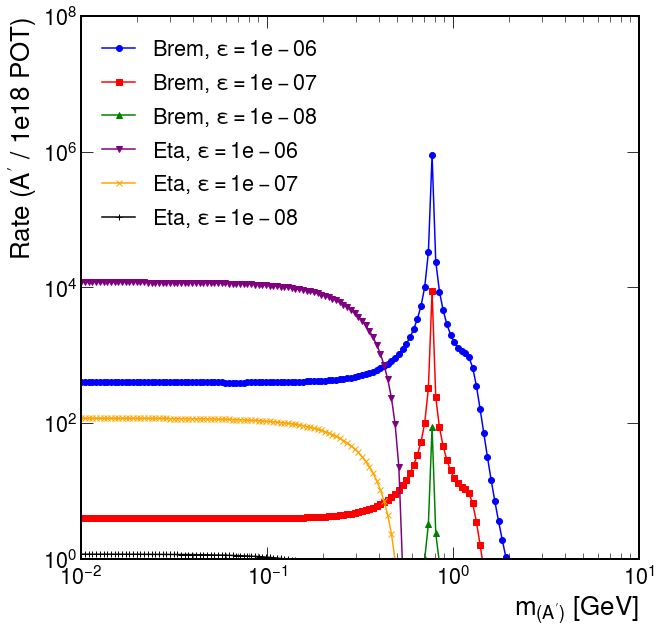

<Figure size 720x720 with 0 Axes>

In [2]:
NPOTs = 0.5e17
utils.plotRates(NPOTs)

Get the Brs and A' times Brs

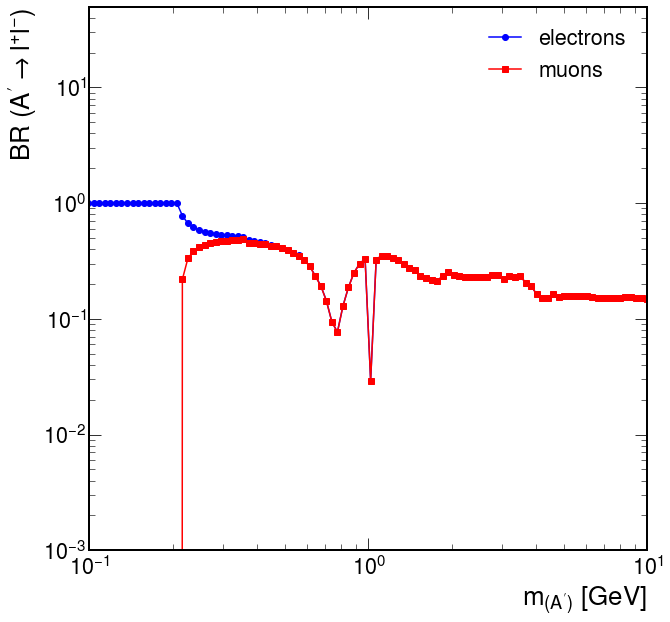

<Figure size 720x720 with 0 Axes>

In [3]:
utils.plotBR()

Function to loop over all the mass and couplings and calculate rates (NAp), branching ratios, acceptance, and final expected number of events

In [4]:
def yields(minVz, maxVz, lep="muons",mech="Brem"):
    
    events = utils.parseAccptFile(minVz,maxVz,lep,mech)
    
    masses = []
    epsilons = []
        
    for ev in events:
        if ev.getMass() not in masses:
            masses.append(ev.getMass())
        if ev.getEps() not in epsilons:
            epsilons.append(ev.getEps())
    
    NAps_per_eps = {}
    brs_per_eps = {}
    accpts_per_eps = {}
    nevts_per_eps = {}
    
    for eps in epsilons:
        
        NAps_per_eps['%.2e'%eps] = {}
        brs_per_eps['%.2e'%eps] = {}
        accpts_per_eps['%.2e'%eps] = {}
        nevts_per_eps['%.2e'%eps] = {}
        
        for m in masses:
            for ev in events:
                if ev.getMass() == m and ev.getEps() == eps:
                    NAp = utils.getRates(m, eps, NPOTs, mech)
                    br = utils.getBR(m, lep)
                    #print(f"m {m} epsilon {eps} NAp {NAp} br {br} rate {rate} accpt {ev.getAccpt()}")
            
                    NAps_per_eps  ['%.2e'%eps]['%.3f'%m] = NAp
                    brs_per_eps   ['%.2e'%eps]['%.3f'%m] = br
                    accpts_per_eps['%.2e'%eps]['%.3f'%m] = ev.getAccpt()
                    nevts_per_eps ['%.2e'%eps]['%.3f'%m] = ev.getAccpt() * NAp
                    
                    break
    
    return accpts_per_eps, nevts_per_eps, NAps_per_eps, brs_per_eps 

In [5]:
def plot2D(inputs2D, lep = "muons", mech="Brem", title= "Acceptance", zmin = None, zmax = None, dologz = False):   
    
    mass_to_plot = []
    eps_to_plot = []
    acc_to_plot = []
    for eps, vals in inputs2D.items():
        for m, acc in vals.items():
            #print(f"mass {m} eps {eps} acc {acc}")
            #if acc > zmin:
            mass_to_plot.append(float(m))
            eps_to_plot.append(float(eps))
            acc_to_plot.append(float(acc))
        
    # now plot
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    #print(mass_to_plot)
    #print(eps_to_plot)
    if dologz:
        sc = ax.scatter(mass_to_plot, eps_to_plot, c=acc_to_plot, cmap=matplotlib.cm.YlOrRd, norm = matplotlib.colors.LogNorm())
    else:
        sc = ax.scatter(mass_to_plot, eps_to_plot, c=acc_to_plot, cmap=matplotlib.cm.YlOrRd)
    #print("scatter: ", sc)
    ax.set_xlabel("mass [GeV]")
    ax.set_ylabel(r"$\epsilon$")
    ax.set_title(f'{title}', fontsize=20)
    ax.set_yscale('log')
    if lep=='muons':
        if 'Brem' in mech:
            ax.set_xlim(.20,2.0)
        else:
            ax.set_xlim(0.2,0.6)
    if lep=='electrons':
        ax.set_ylim(1e-8,1e-2)
        if 'Brem' in mech:
            #ax.set_xlim(.01,3.05)
            ax.set_xlim(.05,2.0)
            ax.set_xscale('log')
        else:
            ax.set_xlim(.05,1.1) 
            ax.set_xscale('log')
    ax.set_ylim(1e-9,1e-2)
    fig.colorbar(sc, ax=ax)
    if zmin and zmax:
        sc.set_clim(zmin,zmax)
    #plt.show()
    plt.savefig(f"{title}_{lep}_{mech}.png")
    plt.show()
    #plt.clf()

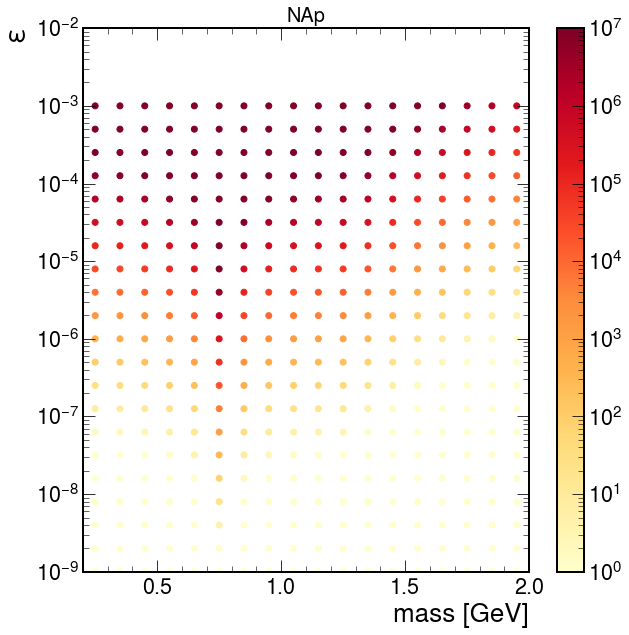

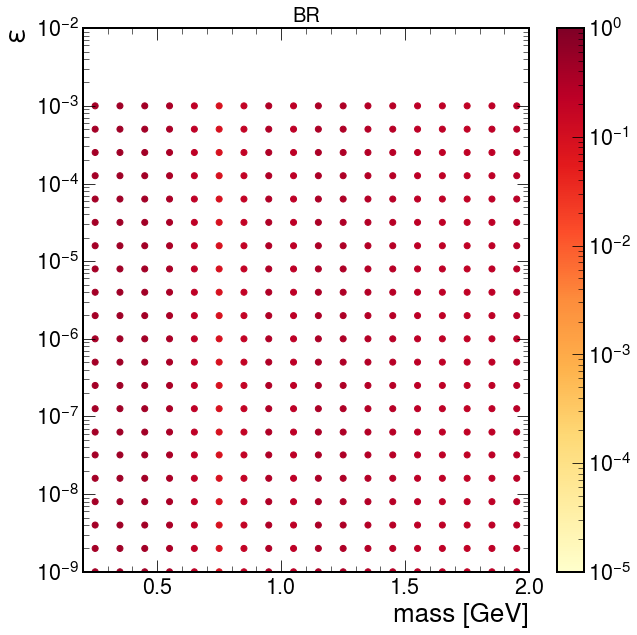

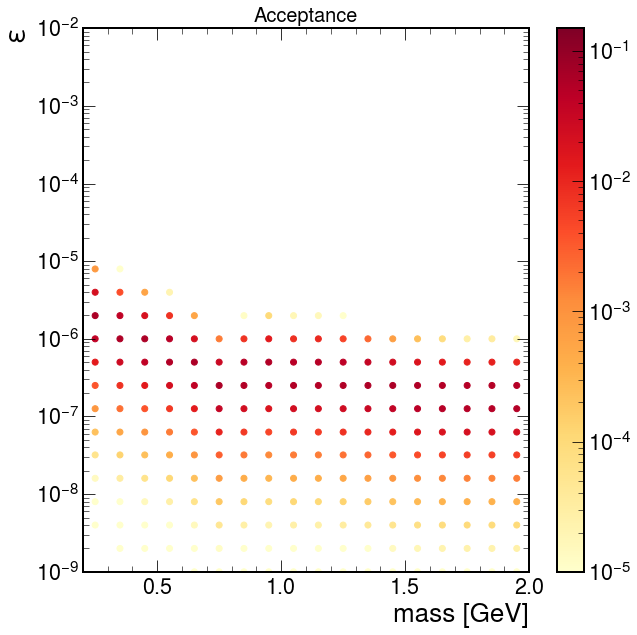

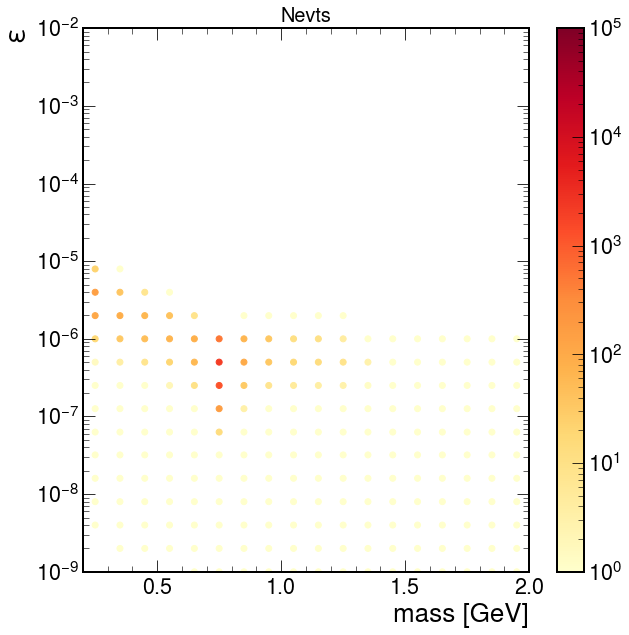

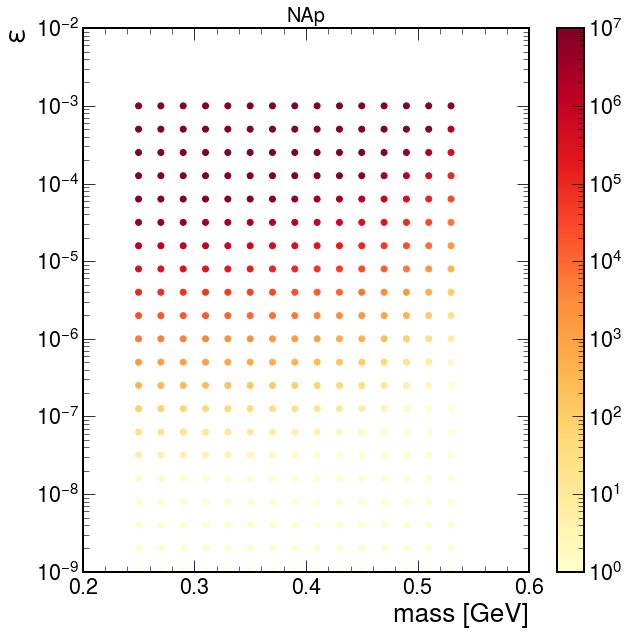

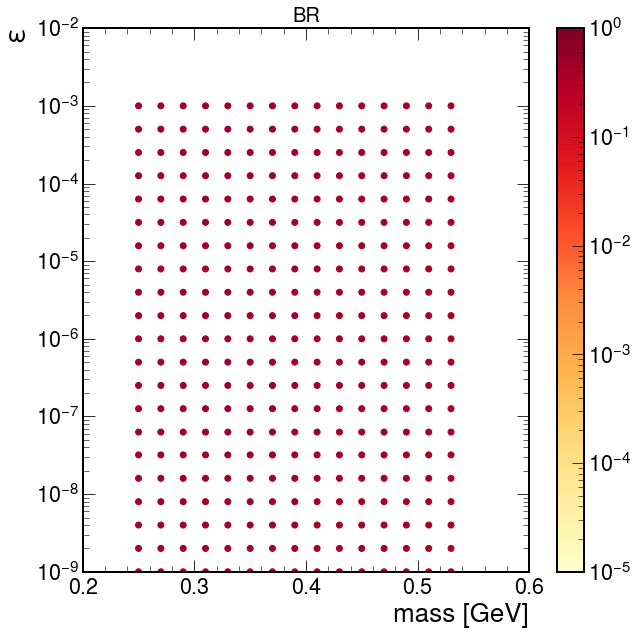

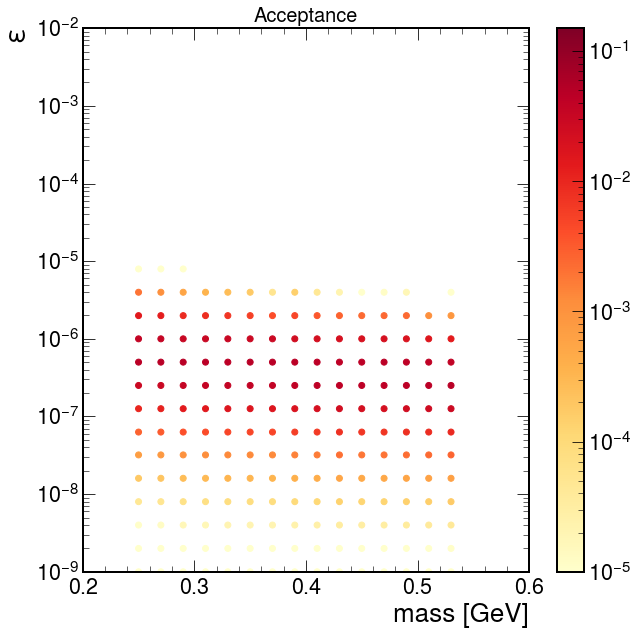

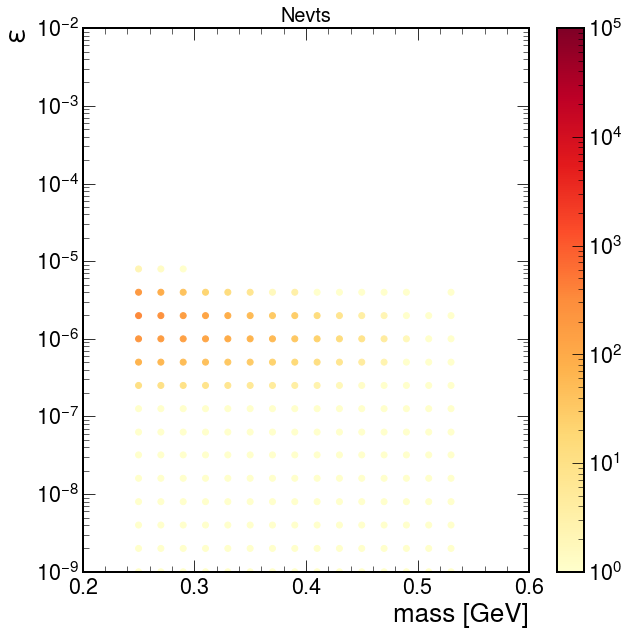

In [7]:
for mech in ["Brem", "Eta"]:
    for lep in ["muons", "electrons"]:
        
        if lep != "muons":
            continue
            
        if lep == "muons":
            slep = "$A^{\prime} \Rightarrow \mu^{+}\mu^{-}$"
        else:
            slep = "$A^{\prime} \Rightarrow e^{+}e^{-}$"
            
        Nmax = 1e5
        if lep == "electrons":
            Nmax = 1e7
            
        accpts, Nevts, NAps, brs = yields(500,600,lep,mech)
        
        plot2D(NAps, zmax = 1e7, zmin = 1,title = "NAp", lep = lep, mech = mech, dologz=1)
        plot2D(brs, zmax = 1, zmin = 1e-5,title = "BR", lep = lep, mech = mech, dologz=1)
        plot2D(accpts, zmax = 0.15, zmin = 1e-5, lep = lep, mech = mech, title = "Acceptance", dologz=1)
        plot2D(Nevts, zmax = Nmax, zmin = 1,title = "Nevts", lep = lep, mech = mech, dologz=1)
